# Smart India Hachathon'2019
## Prolem Statement: Predictive analysis of pharmaceutical equipment
## Team name: Machhali eleven 360, Rank #2 in grand finale at Oriental University, Indore
### IIT Bhubaneswar
### Team member
* Basant Kumar
* Kumari Partibha
* Anand Prakash
* Pawan Saini
* Kumar Ankul
* Gourav Barnwal
### Mentor
* Dr. Adway Mitra
* Dr. Nilgiri Puhan

# First preprocessing of data is done, then training of each model with the dataset followed by testing

In [45]:
import os
import urllib

import numpy as np
from numpy.lib.stride_tricks import as_strided
#import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from sklearn.model_selection import StratifiedShuffleSplit
from hmmlearn import hmm
import scipy.io
#import numpy as np
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('97.mat')
data0=scipy.io.loadmat('118.mat')
sedaptive=50
data1=data['X097_DE_time']
data2=np.array(data1)
data3=data2
l1=int(len(data3)/sedaptive)
data3=np.reshape(data2[:l1*sedaptive],(sedaptive,-1))
data4=data3.T
idx,s=data4.shape
label1=np.full((idx,1),0)

data01=data0['X118_DE_time']
data02=np.array(data1)
data03=data2
l1=int(len(data03)/sedaptive)
data03=np.reshape(data02[:l1*sedaptive],(sedaptive,-1))
data04=data03.T
idx,s=data04.shape
label2=np.full((idx,1),1)
X=np.concatenate((data4,data04),axis=0)
Y=np.concatenate((label1,label2),axis=0)

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)
##

from sklearn.svm import SVC
svm_lin= SVC( kernel='linear', C =5).fit(x_train, y_train)  # for linear
svm_rbf = SVC( kernel='rbf', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf
svm_poly = SVC( kernel='poly', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf


#svm_predictions = svm_model.predict(x_test)  
accuracy1 = svm_lin.score(x_test, y_test)
accuracy8 = svm_rbf.score(x_test, y_test)
accuracy9 = svm_poly.score(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier                     # for rf
dt_model=RandomForestClassifier(n_estimators =100).fit(x_train,y_train)
accuracy2=dt_model.score(x_test,y_test)
#print("RFC accuracy",accuracy)

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
accuracy3 = knn.score(x_test, y_test) 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
accuracy4 = gnb.score(x_test, y_test) 

from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 
accuracy5=dtree_model.score(x_test,y_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 

accuracy6=clf.score(x_test,y_test)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 
accuracy7=clf.score(x_test,y_test) 

C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:54: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:59: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
svm_rbf = SVC( kernel='poly', C =1,gamma='auto',degree=8).fit(x_train, y_train)  # for rbf


C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
from sklearn.ensemble import RandomForestClassifier                     # for rf
dt_model=RandomForestClassifier(n_estimators =500).fit(x_train,y_train)
accuracy2=dt_model.score(x_test,y_test)

C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


## Following code evaluates the parameter like accuracy, precision, recall, f_score, prediction of each test sample and plot confusion matrix

C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Normalized confusion matrix
decision of each test input [ 0.92 -0.18  0.77 ...  0.29  0.34 -0.16]
prediction of each test input [1 0 1 ... 1 1 0]
all data by the model svm lin
accuracy by SVM lin 0.46614906832298136
precision 0.466937743338242
recall 0.46904464415641767
fscore 0.4589668273878801


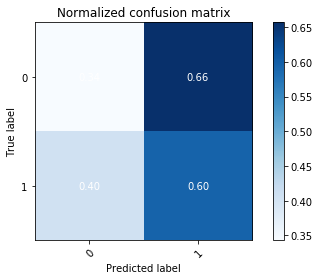

In [164]:
import os
import urllib

import numpy as np
from numpy.lib.stride_tricks import as_strided
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from sklearn.model_selection import StratifiedShuffleSplit
from hmmlearn import hmm
import scipy.io
#import numpy as np
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('97.mat')
data0=scipy.io.loadmat('118.mat')
sedaptive=50
data1=data['X097_DE_time']
data2=np.array(data1)
data3=data2
l1=int(len(data3)/sedaptive)
data3=np.reshape(data2[:l1*sedaptive],(sedaptive,-1))
data4=data3.T
idx,s=data4.shape
label1=np.full((idx,1),0)

data01=data0['X118_DE_time']
data02=np.array(data1)
data03=data2
l1=int(len(data03)/sedaptive)
data03=np.reshape(data02[:l1*sedaptive],(sedaptive,-1))
data04=data03.T
idx,s=data04.shape
label2=np.full((idx,1),1)
X=np.concatenate((data4,data04),axis=0)
Y=np.concatenate((label1,label2),axis=0)

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

# model
from sklearn.svm import SVC
svm_lin= SVC( kernel='linear', C =5).fit(x_train, y_train)  # for linear
accuracy = svm_lin.score(x_test, y_test)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
#    cv2.imwrite('newImage.png',fig)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
# plot cm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

prediction = svm_lin.predict(x_test) 
y_score = prediction
fscore=(f1_score(y_test, y_score, average="macro"))
precision=(precision_score(y_test, y_score, average="macro"))
recall=(recall_score(y_test, y_score, average="macro"))  

np.set_printoptions(precision=2)
class_names=['right','failure']
class_names=np.array(class_names)
# Plot non-normalized confusion matrix
#plot_confusion_matrix(y_test, prediction, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

decision=svm_lin.decision_function(x_test)
print('decision of each test input',decision)
print('prediction of each test input',prediction)

print('all data by the model svm lin')
print('accuracy by SVM lin', accuracy)
print('precision', precision)
print('recall', recall)
print('fscore', fscore)


plt.show()


Normalized confusion matrix
[[0.34 0.66]
 [0.4  0.6 ]]


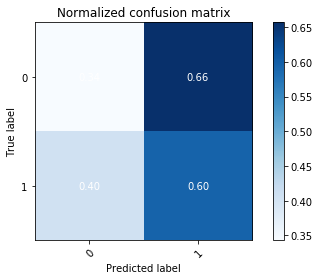

In [127]:
img=plot_confusion_matrix(y_test, prediction, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


In [148]:
aa=svm_lin.decision_function(x_test)

In [149]:
aa

array([ 0.92, -0.18,  0.77, ...,  0.29,  0.34, -0.16])

In [150]:
aaa=svm_lin.predict(x_test)

In [151]:
aaa

array([1, 0, 1, ..., 1, 1, 0])

In [158]:
aaa[1:6]

array([0, 1, 1, 1, 1])

In [2]:

import scipy.io as sio
f0=sio.loadmat('CWRU.mat')

xtrain=f0['training_inputs']
xtest=f0['test_inputs']
ytrain=f0['training_results']
ytest=f0['test_results']

xtrain=xtrain.T
ytrain=ytrain.T
xtest=xtest.T
ytest=ytest.T

x_train=xtrain
y_train=ytrain
x_test=xtest
y_test=ytest

from sklearn.svm import SVC
#svm_lin= SVC( kernel='linear', C =5).fit(x_train, y_train)  # for linear
svm_rbf = SVC( kernel='rbf', C =90,gamma=0.12).fit(x_train, y_train)  # for rbf

accuracy=svm_rbf.score(x_test,y_test)

accuracy


C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9940298507462687

In [5]:
x_train.shape                             

(3500, 100)

In [6]:
3500/(3500+1340)

0.7231404958677686

In [41]:
svm_rbf = SVC( kernel='rbf', C =90,gamma=0.12).fit(x_train, y_train)  # for rbf

accuracy=svm_rbf.score(x_test,y_test)

accuracy

C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9940298507462687

In [2]:
import scipy.io as sio
f0=sio.loadmat('CWRU.mat')

xtrain=f0['training_inputs']
xtest=f0['test_inputs']
ytrain=f0['training_results']
ytest=f0['test_results']

xtrain=xtrain.T
ytrain=ytrain.T
xtest=xtest.T
ytest=ytest.T
x_train=xtrain
y_train=ytrain
x_test=xtest
y_test=ytest

from sklearn.svm import SVC
svm_lin= SVC( kernel='linear', C =5).fit(x_train, y_train)  # for linear
svm_rbf = SVC( kernel='rbf', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf
svm_poly = SVC( kernel='poly', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf


#svm_predictions = svm_model.predict(x_test)  
accuracy1 = svm_lin.score(x_test, y_test)
accuracy8 = svm_rbf.score(x_test, y_test)
accuracy9 = svm_poly.score(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier                     # for rf
dt_model=RandomForestClassifier(n_estimators =100).fit(x_train,y_train)
accuracy2=dt_model.score(x_test,y_test)
#print("RFC accuracy",accuracy)

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
accuracy3 = knn.score(x_test, y_test) 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
accuracy4 = gnb.score(x_test, y_test) 

from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 
accuracy5=dtree_model.score(x_test,y_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 

accuracy6=clf.score(x_test,y_test)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 
accuracy7=clf.score(x_test,y_test) 

C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# nasa dataset
XX=scipy.io.loadmat('nasa.mat')

x_train=XX['training_inputs']
y_train=XX['training_results']
x_test=XX['test_inputs']
y_test=XX['test_results']

x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

from sklearn.svm import SVC
svm_lin= SVC( kernel='rbf', C =15,gamma=0.04).fit(x_train, y_train)  # for linear

accuracy1 = svm_lin.score(x_test, y_test)

print('accuracy by svm_RBF',accuracy1)

In [163]:
import scipy.io as sio
f0=sio.loadmat('nasa.mat')

xtrain=f0['training_inputs']
xtest=f0['test_inputs']
ytrain=f0['training_results']
ytest=f0['test_results']

xtrain=xtrain.T
ytrain=ytrain.T
xtest=xtest.T
ytest=ytest.T
x_train=xtrain
y_train=ytrain
x_test=xtest
y_test=ytest

from sklearn.svm import SVC
svm_lin= SVC( kernel='linear', C =5).fit(x_train, y_train)  # for linear
svm_rbf = SVC( kernel='rbf', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf
svm_poly = SVC( kernel='poly', C =5,gamma=0.341).fit(x_train, y_train)  # for rbf


#svm_predictions = svm_model.predict(x_test)  
accuracy1 = svm_lin.score(x_test, y_test)
accuracy8 = svm_rbf.score(x_test, y_test)
accuracy9 = svm_poly.score(x_test, y_test)

from sklearn.ensemble import RandomForestClassifier                     # for rf
dt_model=RandomForestClassifier(n_estimators =100).fit(x_train,y_train)
accuracy2=dt_model.score(x_test,y_test)
#print("RFC accuracy",accuracy)

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
accuracy3 = knn.score(x_test, y_test) 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
accuracy4 = gnb.score(x_test, y_test) 

from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 
accuracy5=dtree_model.score(x_test,y_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 

accuracy6=clf.score(x_test,y_test)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(x_train, y_train)
dtree_predictions = clf.predict(x_test) 
accuracy7=clf.score(x_test,y_test) 

C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Basant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
import numpy as np
from numpy.lib.stride_tricks import as_strided
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile
from sklearn.model_selection import StratifiedShuffleSplit
from hmmlearn import hmm
import scipy.io
#import numpy as np
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('97.mat')
data0=scipy.io.loadmat('118.mat')
sedaptive=50
data1=data['X097_DE_time']
data2=np.array(data1)
data3=data2
l1=int(len(data3)/sedaptive)
data3=np.reshape(data2[:l1*sedaptive],(sedaptive,-1))
data4=data3.T
idx,s=data4.shape
label1=np.full((idx,1),0)

data01=data0['X118_DE_time']
data02=np.array(data1)
data03=data2
l1=int(len(data03)/sedaptive)
data03=np.reshape(data02[:l1*sedaptive],(sedaptive,-1))
data04=data03.T
idx,s=data04.shape
label2=np.full((idx,1),1)
X=np.concatenate((data4,data04),axis=0)
Y=np.concatenate((label1,label2),axis=0)

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)
##
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x_train, y_train) 

aa=reg.predict(x_test)
print('prediction',aa)

In [166]:
import pandas as pd

data=pd.read_csv('Concrete_Data.csv',skiprows=1)

data=np.array(data)
X=data[:,0:8]
Y=data[:,8]

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)


In [ ]:
# logistic regression
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x_train, y_train) 

aa=reg.predict(x_test)
print('prediction',aa)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=aa
ans=mean_squared_error(y_test, y_pred)

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x_train, y_train)

aa=reg.predict(x_test)
print('prediction',aa)